In [18]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()
diabetes.shape

(768, 9)

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
X = diabetes.drop(columns=['Outcome'])
X.head()
Y = diabetes.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:

from sklearn.model_selection import train_test_split

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1, stratify = Y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
vorhersage_scikit = knn.fit(X_training, Y_training)

In [7]:
vorhersage_scikit = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, vorhersage_scikit))

0.6688311688311688


In [10]:
import numpy as np
from sklearn.model_selection import cross_val_score

klassifikator_kreuzvalidierung = KNeighborsClassifier(n_neighbors=3)
kreuzvalidierung_genauigkeiten = cross_val_score(klassifikator_kreuzvalidierung, X, Y, cv=5, scoring='accuracy')
print(kreuzvalidierung_genauigkeiten)
print(np.mean(kreuzvalidierung_genauigkeiten))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
0.7135557253204311


In [13]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
k_grid={'n_neighbors': np.arange(1, 100)}
knn_grid = GridSearchCV(knn2, k_grid, cv=5)
knn_grid.fit(X, Y)
knn_grid.best_params_
knn_grid.best_score_
print(knn_grid.best_params_, knn_grid.best_score_)

{'n_neighbors': np.int64(14)} 0.7578558696205755


In [14]:
scores = knn_grid.cv_results_['mean_test_score']
scores

array([0.66282149, 0.69404974, 0.71355573, 0.72135642, 0.72397929,
       0.72790086, 0.73571853, 0.7500382 , 0.74221204, 0.74480095,
       0.74873101, 0.7526356 , 0.75525847, 0.75785587, 0.73836686,
       0.74352771, 0.75137085, 0.74875647, 0.75008064, 0.74877345,
       0.74357864, 0.74614209, 0.7435362 , 0.7435362 , 0.73703421,
       0.74093031, 0.74094729, 0.73830744, 0.74219506, 0.74611663,
       0.74479246, 0.74610814, 0.74612512, 0.74743231, 0.74871403,
       0.74742382, 0.74351923, 0.73959766, 0.74481793, 0.73699177,
       0.73571853, 0.73440285, 0.73439436, 0.73048128, 0.73567609,
       0.7356676 , 0.73570155, 0.74090485, 0.73960615, 0.73569307,
       0.73700025, 0.73441134, 0.73310415, 0.73178847, 0.73179696,
       0.72918258, 0.73309566, 0.73829047, 0.73569307, 0.73698328,
       0.73827349, 0.74218657, 0.73828198, 0.74220355, 0.73699177,
       0.73699177, 0.73960615, 0.72785842, 0.7304728 , 0.72524404,
       0.7304728 , 0.73044733, 0.72524404, 0.72003226, 0.72784

Text(0, 0.5, 'Mean Test Score')

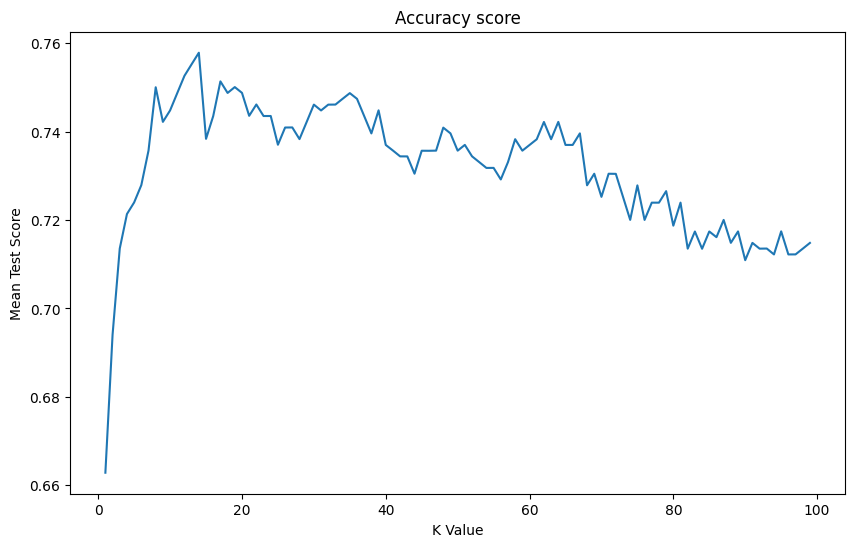

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), scores)
plt.title('Accuracy score')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')